source: https://github.com/dhruvpandey662/Emotion-detection

In [3]:
# Get the test data
!wget https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0

--2023-07-27 01:51:40--  https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/w3zlhing4dkgeyb/train.zip [following]
--2023-07-27 01:51:41--  https://www.dropbox.com/s/raw/w3zlhing4dkgeyb/train.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc53a5d094561b32f6df65c7a8c2.dl.dropboxusercontent.com/cd/0/inline/CApxaEzsj91X4VK8CefMa4-OxOYsNqQ8XesTmNzahxybiJ1df1Zo5yP912J90peia5ZwOu-VnNPxNav9fQNoe0Czmrc63TwFfj3oluqbHWr4xpNd5j7dfIMTKoTjiEMJdeYb-nEsmgJXcnkxwK_PUubN/file# [following]
--2023-07-27 01:51:41--  https://uc53a5d094561b32f6df65c7a8c2.dl.dropboxusercontent.com/cd/0/inline/CApxaEzsj91X4VK8CefMa4-OxOYsNqQ8XesTmNzahxybiJ1df1Zo5yP912J90peia5ZwOu-VnNPxNav9fQNoe0Czmrc63TwFfj3oluqbHW

In [4]:
!unzip train.zip\?dl\=0

Archive:  train.zip?dl=0
  inflating: train/Happy/images (34).jpg  
  inflating: train/Happy/images (29).jpg  
  inflating: train/Neutral/images (39).jpg  
  inflating: train/Happy/images (19).jpg  
  inflating: train/Happy/images (22).jpg  
  inflating: train/Happy/images (32).jpg  
  inflating: train/Happy/images (27).jpg  
  inflating: train/Happy/images (33).jpg  
  inflating: train/Happy/images (28).jpg  
  inflating: train/Neutral/images (41).jpg  
  inflating: train/Happy/images (31).jpg  
  inflating: train/Happy/images (14).jpg  
  inflating: train/Happy/images (20).jpg  
  inflating: train/Happy/images (13).jpg  
  inflating: train/Happy/images (16).jpg  
  inflating: train/Neutral/images (42).jpg  
  inflating: train/Happy/images (21).jpg  
  inflating: train/Happy/images (24).jpg  
  inflating: train/Happy/images (35).jpg  
  inflating: train/Happy/images (18).jpg  
  inflating: train/Neutral/images (44).jpg  
  inflating: train/Happy/images (30).jpg  
  inflating: train/Ha

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.models import Model
from keras.layers import Flatten, Dense

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

## Building Model

In [7]:
## pretrained model
model_MN = MobileNet (input_shape=(224, 224, 3), include_top=False)

for layer in model_MN.layers:
  layer.trainable = False

x = Flatten()(model_MN.output)
x = Dense(units=7, activation='softmax')(x)

# create the model

model = Model(model_MN.input, x)

17225924/17225924 [==============================] - 0s 0us/step


In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Data Generator

In [10]:
train_datagen = ImageDataGenerator(
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory="/content/train",
                                               target_size=(224,224),
                                               batch_size=32)

train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [11]:
val_datagen = ImageDataGenerator(rescale = 1/225)

val_data = val_datagen.flow_from_directory(directory="/content/train",
                                          target_size=(224,225),
                                          batch_size=32)

Found 350 images belonging to 7 classes.


## Visualizing the Data

In [12]:
t_img, label = train_data.next()

def plotImages(img_arr, label):
  count = 0
  for im, l in zip(img_arr, label):
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    count != 1
    if count == 10:
      break

plotImages(t_img, label)

Output hidden; open in https://colab.research.google.com to view.

## Training with Early Stopping and Model Checkpoint

In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=5, verbose=1, mode='auto')

mc = ModelCheckpoint(filepath="model_MN.h5", monitor="val_accuracy", verbose=1, save_best_only=True, mode='auto')

call_back = [es, mc]

In [14]:
hist = model.fit_generator(train_data,
                           steps_per_epoch=10,
                           epochs=30,
                           validation_data=val_data,
                           validation_steps=8,
                           callbacks=call_back)

<ipython-input-14-0bb6f3be8d25>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 11.2740 - accuracy: 0.2138
Epoch 1: val_accuracy improved from -inf to 0.42578, saving model to model_MN.h5
10/10 [==============================] - 50s 5s/step - loss: 11.2740 - accuracy: 0.2138 - val_loss: 4.7193 - val_accuracy: 0.4258
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 4.1092 - accuracy: 0.4906
Epoch 2: val_accuracy improved from 0.42578 to 0.73828, saving model to model_MN.h5
10/10 [==============================] - 43s 4s/step - loss: 4.1092 - accuracy: 0.4906 - val_loss: 1.3491 - val_accuracy: 0.7383
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 1.6841 - accuracy: 0.7390
Epoch 3: val_accuracy improved from 0.73828 to 0.82031, saving model to model_MN.h5
10/10 [==============================] - 46s 5s/step - loss: 1.6841 - accuracy: 0.7390 - val_loss: 0.8187 - val_accuracy: 0.8203
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.7723 - acc

## Testing on an Image

In [15]:
from keras.models import load_model

model = load_model('/content/model_MN.h5')

In [16]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

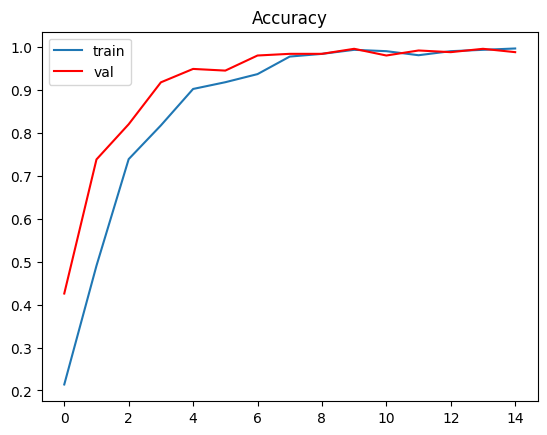

In [21]:
plt.plot(h['accuracy'], label='train')
plt.plot(h['val_accuracy'], label='val', c='red')
plt.title('Accuracy')
plt.legend()
plt.show()

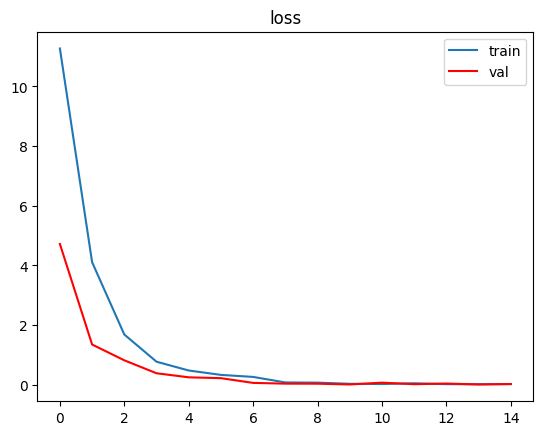

In [29]:
plt.plot(h['loss'], label='train')
plt.plot(h['val_loss'], label='val', c='red')
plt.title('loss')
plt.legend()
plt.show()

In [19]:
# mapping values
op = dict(zip(train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 0s 208ms/step
Disguist


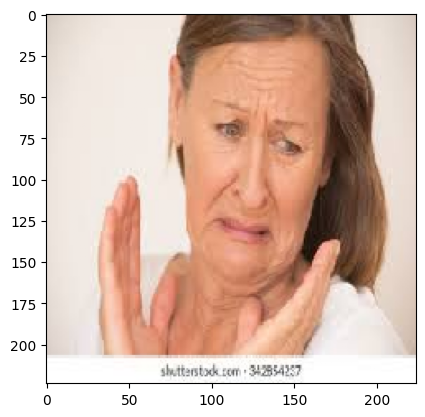

In [28]:
img = load_img("/content/train/Disguist/images (26).jpg", target_size=(224,224))
i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))
print(op[pred])

plt.imshow(input_arr[0])
plt.show()